## G4 Replication Time Comparison

In [1]:
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
import matplotlib.patches as mpatches
from matplotlib.cm import get_cmap
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


import sys 
sys.path.insert(0, "../scripts")

from dotenv import load_dotenv
true = load_dotenv("../scripts/.env")
print(true)
import dask.dataframe as dd
from constants import ConfigPaths
import pybedtools
from pybedtools import BedTool

True


In [2]:
g4_df = pd.read_table(ConfigPaths.G4HUNTER.value).drop(columns=['NBR'])
g4_bed =  BedTool.from_dataframe(g4_df).sort()

controls_g4_df = pd.read_table(ConfigPaths.CONTROL_G4HUNTER.value)
controls_g4_bed = BedTool.from_dataframe(controls_g4_df).sort()

In [2]:
regex_df = pd.read_table(ConfigPaths.G4REGEX.value)
regex_bed = BedTool.from_dataframe(regex_df).sort()

In [3]:
controls_g4_df.shape

(2804343, 9)

## G4 Density

In [4]:
compartments_df = pd.read_table("../compartments_T2T_coding_protein_coding.csv")
compartments_bed = BedTool.from_dataframe(compartments_df).sort()
compartments_df

,seqID,start,end,compartment,biotype,comp
0,chr1,0,3000,Telomere,.,Telomere
1,chr1,7505,12982,Exon,non_coding,Non Coding Exons
2,chr1,7505,138480,Gene,non_coding,Non Coding Genes
3,chr1,12273,12571,Alu,.,Alu
4,chr1,13444,13584,Exon,non_coding,Non Coding Exons
...,...,...,...,...,...,...
2046768,chrY,62451062,62451171,Exon,non_coding,Non Coding Exons
2046769,chrY,62451556,62451910,Exon,non_coding,Non Coding Exons
2046770,chrY,62451910,62452910,Promoter,non_coding,Non Coding Promoters
2046771,chrY,62452320,62453637,censat,.,censat


In [5]:
compartments_df.comp.value_counts()

comp
Alu                         1147457
Protein Coding Exons         233500
CDS                          213041
Non Coding Exons             137076
Enhancer                      85565
5' UTR                        67876
Silencer                      33654
3' UTR                        31111
Non Coding Promoters          27049
Non Coding Genes              24349
Protein Coding Promoters      18880
Protein Coding Genes          17408
SVA                            7379
ct                              856
censat                          639
mon                             191
bsat                            184
hsat3                           180
gsat                             64
hsat2                            61
hsat1B                           61
dhor                             59
hor                              54
Telomere                         50
hsat1A                           24
rDNA                              5
Name: count, dtype: int64

In [6]:
# GENOME SIZE
genome_size = pd.read_table(ConfigPaths.GENOME_SIZE.value, header=None)[1].sum()
print(f"Detected genome size: {genome_size}.")

# G4 DENSITY
g4_gw_density = pd.read_table(
                            g4_bed.sort().merge().fn, 
                            header=None, 
                            names=["seqID", "start", "end"]
)
g4_gw_density["size"] = g4_gw_density["end"] - g4_gw_density["start"]
g4_gw_density = g4_gw_density["size"].sum() * 1e6 / genome_size

# REGEX DENSITY
g4_gw_regex_density = pd.read_table(
                            regex_bed.sort().merge().fn, 
                            header=None, 
                            names=["seqID", "start", "end"]
)
g4_gw_regex_density["size"] = g4_gw_regex_density["end"] - g4_gw_regex_density["start"]
g4_gw_regex_density = g4_gw_regex_density["size"].sum() * 1e6 / genome_size

# CONTROL DENSITY
control_gw_density = pd.read_table(
                            controls_g4_bed.sort().merge().fn, 
                            header=None, 
                            names=["seqID", "start", "end"]
)
control_gw_density["size"] = control_gw_density["end"] - control_gw_density["start"]
control_gw_density = control_gw_density["size"].sum() * 1e6 / genome_size

g4_gw_density, g4_gw_regex_density, control_gw_density

Detected genome size: 3117292070.


(np.float64(17745.228794041104),
 np.float64(3304.802299131374),
 np.float64(22841.721083902157))

In [7]:
compartments_df["comp"].unique()

array(['Telomere', 'Non Coding Exons', 'Non Coding Genes', 'Alu',
       'Non Coding Promoters', 'Enhancer', 'CDS', 'Protein Coding Exons',
       'Protein Coding Genes', 'Protein Coding Promoters', 'SVA',
       'Silencer', "5' UTR", "3' UTR", 'ct', 'censat', 'hor', 'dhor',
       'hsat2', 'hsat3', 'gsat', 'bsat', 'mon', 'hsat1B', 'hsat1A',
       'rDNA'], dtype=object)

In [7]:
g4_df[["seqID", "start", "end"]].to_csv("/storage/group/izg5139/default/nicole/g4_t2t_identification/encode/g4_hunter_motifs.bed", sep="\t", mode="w", index=False, header=None)

In [8]:
controls_g4_df[["seqID", "start", "end"]].to_csv("/storage/group/izg5139/default/nicole/g4_t2t_identification/encode/g4_controls_hunter_motifs.bed", sep="\t", mode="w", index=False, header=None)

In [9]:
control_regex_df = pd.read_table(ConfigPaths.CONTROL_G4REGEX.value)
control_regex_bed = BedTool.from_dataframe(control_regex_df[["seqID", "start", "end"]]).sort().merge()

regex_df = pd.read_table(ConfigPaths.G4REGEX.value)
regex_bed = BedTool.from_dataframe(regex_df[["seqID", "start", "end"]]).sort().merge()
regex_df

,seqID,start,end,sequence,strand,length
0,chr1,2,25,CCCTAAACCCTAACCCCTAACCC,-,23
1,chr1,28,49,CCCTAACCCTAACCCTAACCC,-,21
2,chr1,52,75,CCCCTAAACCCTAACCCTAACCC,-,23
3,chr1,78,99,CCCTAACCCTAACCCTAACCC,-,21
4,chr1,102,123,CCCTAACCCTAACCCTAACCC,-,21
...,...,...,...,...,...,...
414899,chrM,2988,3012,CCCCCCTCCCCATACCCAACCCCC,-,24
414900,chrM,7674,7708,CCCGTATTTACCCTATAGCACCCCCTCTACCCCC,-,34
414901,chrM,9606,9631,CCCTATATCCCCCGCCCGCGTCCCC,-,25
414902,chrM,11784,11813,CCCTAACCCTGACTTCCCTAATTCCCCCC,-,29


In [8]:
from gff_utils import CoverageExtractor

coverage_g4 = pl.read_csv(
                    compartments_bed.coverage(g4_bed).fn,
                    has_header=False,
                    separator="\t",
                    new_columns=list(compartments_df.columns) + CoverageExtractor.COVERAGE_FIELDS
)\
.with_columns(
        density=1e6 * pl.col("coverage")
)\
.with_columns(
    fold_enrichment=pl.col("density") / g4_gw_density
)

coverage_regex_g4 = pl.read_csv(
                    compartments_bed.coverage(regex_bed).fn,
                    has_header=False,
                    separator="\t",
                    new_columns=list(compartments_df.columns) + CoverageExtractor.COVERAGE_FIELDS
)\
.with_columns(
        density=1e6 * pl.col("coverage")
)\
.with_columns(
    fold_enrichment=pl.col("density") / g4_gw_regex_density
)

coverage_g4

seqID,start,end,compartment,biotype,comp,totalHits,overlappingBp,compartmentLength,coverage,density,fold_enrichment
str,i64,i64,str,str,str,i64,i64,i64,f64,f64,f64
"""chr1""",0,3000,"""Telomere""",""".""","""Telomere""",289,2539,3000,0.8463333,846333.3,47.693569
"""chr1""",7505,12982,"""Exon""","""non_coding""","""Non Coding Exons""",2,60,5477,0.0109549,10954.9,0.617343
"""chr1""",7505,138480,"""Gene""","""non_coding""","""Non Coding Genes""",210,4663,130975,0.0356022,35602.2,2.006297
"""chr1""",12273,12571,"""Alu""",""".""","""Alu""",0,0,298,0.0,0.0,0.0
"""chr1""",13444,13584,"""Exon""","""non_coding""","""Non Coding Exons""",0,0,140,0.0,0.0,0.0
…,…,…,…,…,…,…,…,…,…,…,…
"""chrY""",62451062,62451171,"""Exon""","""non_coding""","""Non Coding Exons""",0,0,109,0.0,0.0,0.0
"""chrY""",62451556,62451910,"""Exon""","""non_coding""","""Non Coding Exons""",0,0,354,0.0,0.0,0.0
"""chrY""",62451910,62452910,"""Promoter""","""non_coding""","""Non Coding Promoters""",2,88,1000,0.088,88000.0,4.959079


In [16]:
centromeric_regions = {"censat", "ct", "rDNA", "hsat3", "hsat1B", "dor", "dhor", "mon", "bsat", "gsat", "hsat2", "hsat1A"}

centromere_df = pl.from_pandas(compartments_df).filter(pl.col("comp").is_in(centromeric_regions))
centromere_bed = BedTool.from_dataframe(centromere_df.to_pandas()).sort()

centromere_df

seqID,start,end,compartment,biotype,comp
str,i64,i64,str,str,str
"""chr1""",116796047,121405145,"""ct""",""".""","""ct"""
"""chr1""",121405145,121406286,"""censat""",""".""","""censat"""
"""chr1""",121406286,121619169,"""ct""",""".""","""ct"""
"""chr1""",121788213,121790362,"""ct""",""".""","""ct"""
"""chr1""",126701150,126824128,"""dhor""",""".""","""dhor"""
…,…,…,…,…,…
"""chrY""",62025776,62037362,"""censat""",""".""","""censat"""
"""chrY""",62052955,62059882,"""censat""",""".""","""censat"""
"""chrY""",62061431,62072743,"""hsat3""",""".""","""hsat3"""


In [20]:
centromeric_g4 = pd.read_table(g4_bed.intersect(centromere_bed, u=True).fn,
                                                header=None,
                                                names=list(g4_df.columns) 
                                                )
centromeric_g4.shape[0], centromeric_g4.shape[0] / g4_df.shape[0] * 100

(191049, 9.179835872036119)

In [22]:
centromeric_g4 = pd.read_table(regex_bed.intersect(centromere_bed, u=True).fn,
                                                header=None,
                                                names=list(g4_df.columns) 
                                                )
centromeric_g4.shape[0], centromeric_g4.shape[0] / regex_df.shape[0] * 100

(44010, 10.607273007731909)

In [9]:
coverage_g4_regex_grped = coverage_regex_g4.group_by("comp").agg(
                                pl.col("overlappingBp").sum().alias("overlappingBp"),
                                pl.col("compartmentLength").sum().alias("compartmentLength"),
                            )


coverage_g4_regex_grped = coverage_g4_regex_grped.with_columns(
                density=1e6 * pl.col("overlappingBp") / pl.col("compartmentLength"),
).with_columns(
                    fold_enrichment=pl.col("density") / g4_gw_regex_density   
).sort(['fold_enrichment'], descending=True)

coverage_g4_regex_grped.head(20).to_pandas()

,comp,overlappingBp,compartmentLength,density,fold_enrichment
0,Telomere,121971,150901,808284.902022,244.578897
1,Silencer,372219,7462185,49880.698482,15.093399
2,SVA,189330,4668676,40553.253214,12.271007
3,rDNA,327434,9928083,32980.586484,9.979594
4,Protein Coding Promoters,403152,19694164,20470.632823,6.194208
5,gsat,8921,650590,13712.168954,4.149165
6,Non Coding Promoters,336279,27691353,12143.826992,3.674600
7,Enhancer,620181,53613792,11567.564555,3.500229
8,5' UTR,240137,22206929,10813.606870,3.272089
9,censat,60105,8912512,6743.889938,2.040633


In [10]:
coverage_g4_grped = coverage_g4.group_by("comp").agg(
                                pl.col("overlappingBp").sum().alias("overlappingBp"),
                                pl.col("compartmentLength").sum().alias("compartmentLength"),
                            )


coverage_g4_grped = coverage_g4_grped.with_columns(
                density=1e6 * pl.col("overlappingBp") / pl.col("compartmentLength"),
).with_columns(
                    fold_enrichment=pl.col("density") / g4_gw_density   
).sort(['fold_enrichment'], descending=True)

coverage_g4_grped.head(20).to_pandas()

,comp,overlappingBp,compartmentLength,density,fold_enrichment
0,Telomere,136925,150901,907382.986196,51.133913
1,SVA,1059233,4668676,226880.811605,12.785454
2,Silencer,1151040,7462185,154249.727124,8.692462
3,rDNA,1000707,9928083,100795.591657,5.680152
4,Protein Coding Promoters,1577245,19694164,80086.923212,4.513152
5,Enhancer,3188876,53613792,59478.650568,3.351811
6,Non Coding Promoters,1345199,27691353,48578.305293,2.737542
7,5' UTR,1040643,22206929,46861.184633,2.640777
8,gsat,30379,650590,46694.538803,2.631386
9,Protein Coding Exons,3233530,102447877,31562.684310,1.778658


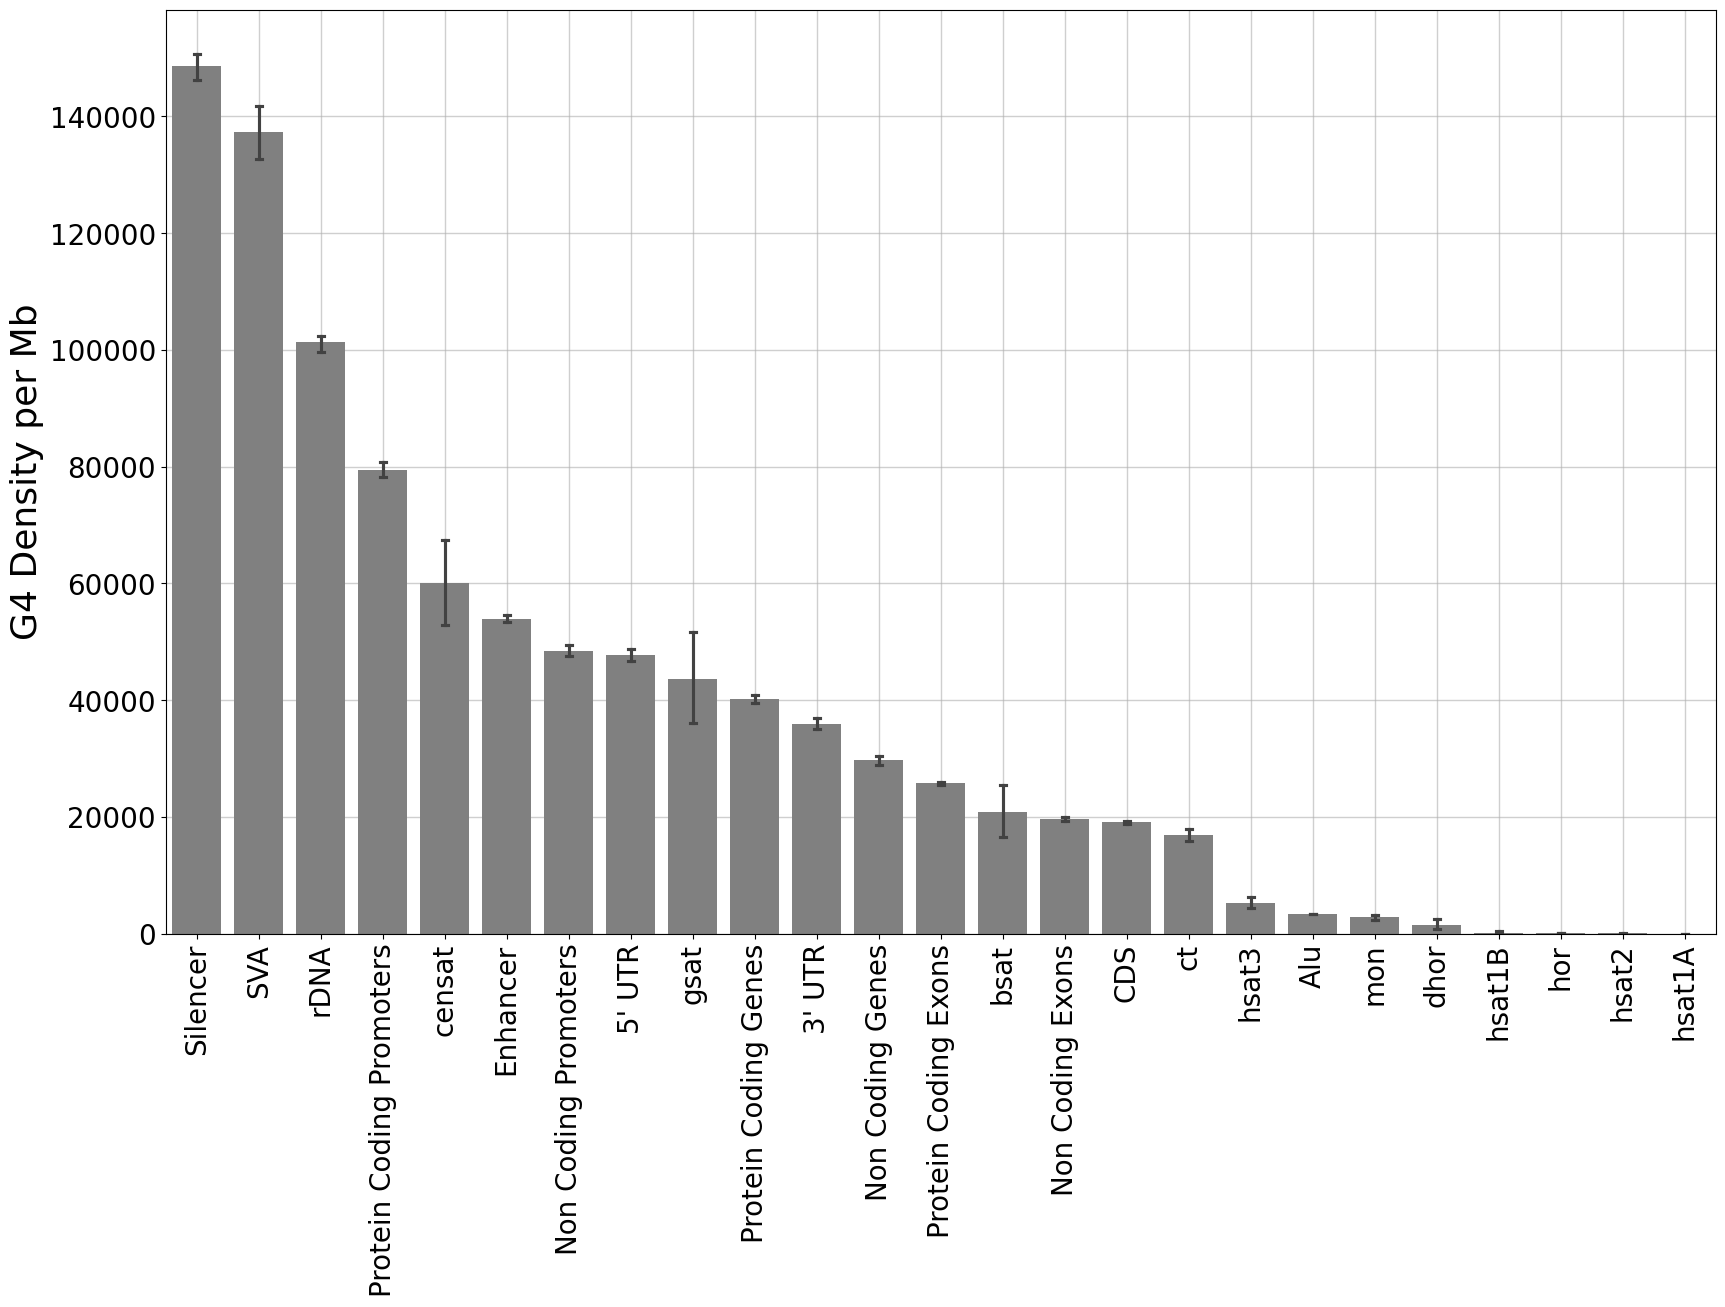

In [10]:
import matplotlib.patches as mpatches
from matplotlib.cm import get_cmap

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 12))
fig.subplots_adjust(wspace=0.2, hspace=0.3)
# ax = ax.flatten()

cmap = "RdBu"
coverage_g4 = coverage_g4.with_columns(
                                comp=pl.col("comp").replace("five_prime_UTR", "5' UTR").replace("three_prime_UTR", "3' UTR")
)

sorted_comps = list(coverage_g4.filter(pl.col("comp") != "Telomere")\
                        .group_by("comp")\
                        .agg(pl.col("density").mean()).sort(['density'], descending=True)['comp'])

sns.barplot(data=coverage_g4.filter(pl.col("comp") != "Telomere"),
            y="density",
            x="comp",
            ax=ax,
            color="gray",
            order=sorted_comps,
            capsize=.1,
           )

ax.title.set_size(20)
ax.grid(lw=1.0, alpha=0.6, zorder=0)
ax.set_ylabel("G4 Density per Mb")
ax.set_xlabel("")
ax.xaxis.label.set_size(26)
ax.yaxis.label.set_size(26)
ax.tick_params(axis="both", labelsize=20)
ax.tick_params(axis="x", rotation=90)
ax.set_axisbelow(True)

target = Path("/storage/group/izg5139/default/nicole/g4_t2t_identification/figures/g4_density").resolve()
target.mkdir(exist_ok=True)
fig.savefig(f"{target}/g4hunter_density_compartments.pdf", dpi=300, bbox_inches="tight")

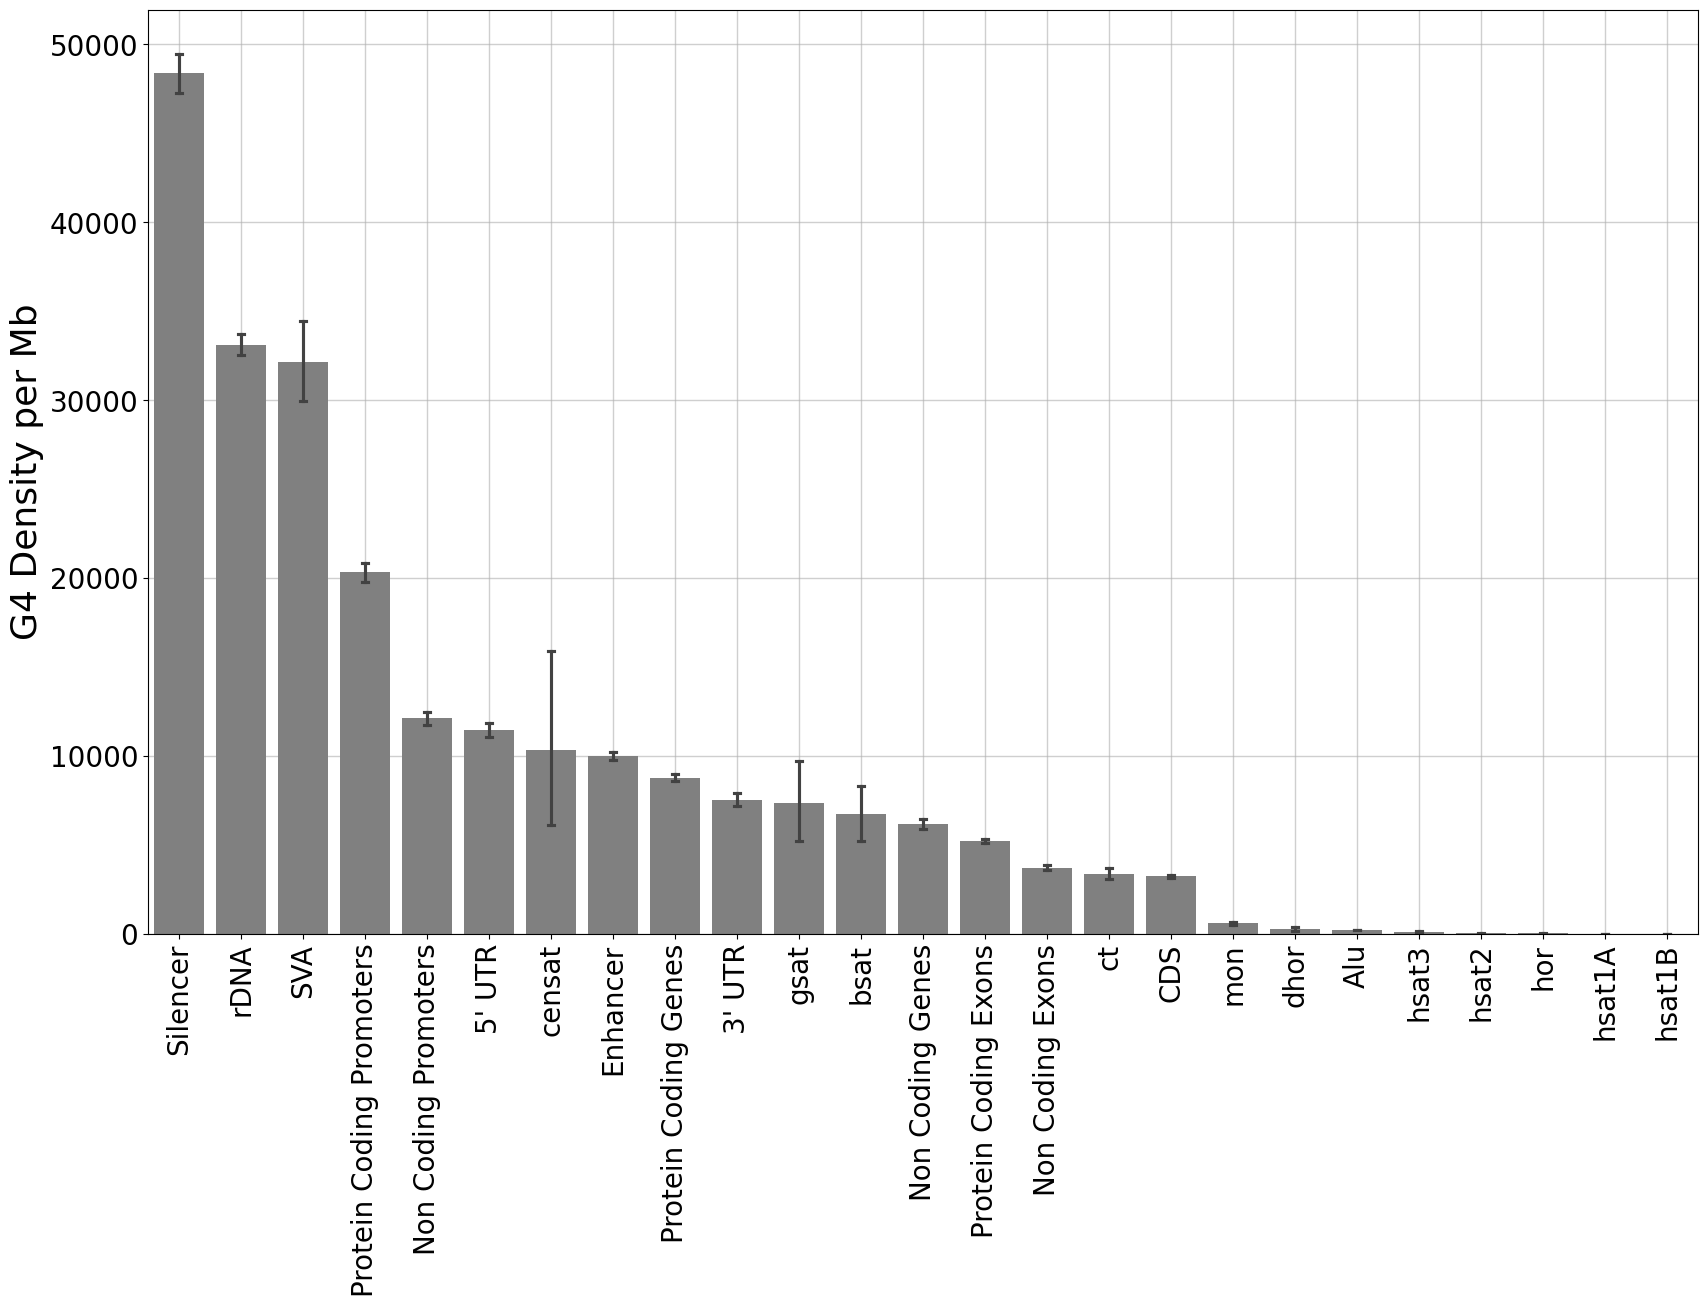

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 12))
fig.subplots_adjust(wspace=0.2, hspace=0.3)
# ax = ax.flatten()

cmap = "RdBu"
coverage_g4 = coverage_regex_g4.with_columns(
                                comp=pl.col("comp").replace("five_prime_UTR", "5' UTR").replace("three_prime_UTR", "3' UTR")
)

sorted_comps = list(coverage_regex_g4.filter(pl.col("comp") != "Telomere")\
                        .group_by("comp")\
                        .agg(pl.col("density").mean()).sort(['density'], descending=True)['comp'])

sns.barplot(data=coverage_regex_g4.filter(pl.col("comp") != "Telomere"),
            y="density",
            x="comp",
            ax=ax,
            color="gray",
            order=sorted_comps,
            capsize=.1,
           )

ax.title.set_size(20)
ax.grid(lw=1.0, alpha=0.6, zorder=0)
ax.set_ylabel("G4 Density per Mb")
ax.set_xlabel("")
ax.xaxis.label.set_size(26)
ax.yaxis.label.set_size(26)
ax.tick_params(axis="both", labelsize=20)
ax.tick_params(axis="x", rotation=90)
ax.set_axisbelow(True)

target = Path("/storage/group/izg5139/default/nicole/g4_t2t_identification/figures/g4_density").resolve()
target.mkdir(exist_ok=True)
fig.savefig(f"{target}/regex_density_compartments.pdf", dpi=300, bbox_inches="tight")

## G4 Methylation

In [14]:
def extract_methylation(meth_prob: float) -> str:
    if meth_prob < 0.2:
        return "Hypomethylated"
    if meth_prob < 0.7:
        return "Methylated"
    return "Hypermethylated"

methylation_df = pl.read_csv(
                             ConfigPaths.HG002_METH.value, 
                             separator="\t", 
                             has_header=False,
                             new_columns=["seqID", "start", "end", "methylation_level"]
                            )
print(methylation_df.shape)
methylation_df = methylation_df.filter(pl.col("start") <= pl.col("end"))
methylation_bed = BedTool.from_dataframe(methylation_df.to_pandas()).sort()
methylation_df

(33302394, 4)


seqID,start,end,methylation_level
str,i64,i64,f64
"""chr1""",1870,1872,0.0
"""chr1""",1882,1884,0.0
"""chr1""",1888,1890,0.0
"""chr1""",1894,1896,0.333333
"""chr1""",1900,1902,0.666667
…,…,…,…
"""chrM""",16307,16309,0.347875
"""chrM""",16403,16405,0.150315
"""chrM""",16490,16492,0.302882


In [4]:
methylation_bed = BedTool(ConfigPaths.HG002_METH.value)
methylation_bed.count()

33302394

In [ ]:

g4_df_meth = pl.read_csv(
                g4_bed.intersect(methylation_bed, wo=True).fn,
                has_header=False,
                separator="\t",
                new_columns=list(g4_df.columns) + ["chr", "m_start", "m_end", "meth_level"] + ["overlap"]
            ).group_by(g4_df.columns)\
            .agg(
                    pl.col("meth_level").mean().alias("avg_methylation"),
                    pl.col("meth_level").count().alias("meth_count"),
            ).with_columns(
                    pl.col("avg_methylation").map_elements(extract_methylation, return_dtype=str)\
                            .alias("methylation_level")
            )
g4_df_meth

In [15]:
methylation_CHM13v2_df = pl.read_csv(
                             ConfigPaths.CHM13v2_METH.value, 
                             separator="\t", 
                             has_header=False,
                             new_columns=["seqID", "start", "end", "methylation_level"]
                            )
print(methylation_CHM13v2_df.shape)
methylation_CHM13v2_df = methylation_CHM13v2_df.filter(pl.col("start") <= pl.col("end"))
methylation_CHM13v2_bed = BedTool.from_dataframe(methylation_CHM13v2_df.to_pandas()).sort()
methylation_CHM13v2_df

(31691501, 4)


seqID,start,end,methylation_level
str,i64,i64,f64
"""chr1""",1869,1871,0.972
"""chr1""",1875,1877,0.972
"""chr1""",1881,1883,0.972
"""chr1""",1887,1889,0.972
"""chr1""",1893,1895,0.972
…,…,…,…
"""chrX""",154256496,154256498,1.0
"""chrX""",154256548,154256550,0.935
"""chrX""",154256551,154256553,0.935


In [16]:
# HG002
g4_regex_df_HG002_meth = pl.read_csv(
                regex_bed.intersect(methylation_bed, wo=True).fn,
                has_header=False,
                separator="\t",
                new_columns=["seqID", "start", "end"] + ["chr", "m_start", "m_end", "meth_level"] + ["overlap"]
            ).group_by(["seqID", "start", "end"])\
            .agg(
                    pl.col("meth_level").mean().alias("avg_methylation"),
                    pl.col("meth_level").count().alias("meth_count"),
            ).with_columns(
                    pl.col("avg_methylation").map_elements(extract_methylation, return_dtype=str)\
                            .alias("methylation_level")
            )

g4_regex_controls_HG002_meth = pl.read_csv(                
                        control_regex_bed.intersect(methylation_bed, wo=True).fn,
                        has_header=False,
                        separator="\t",
                        new_columns=["seqID", "start", "end"] + ["chr", "m_start", "m_end", "meth_level"] + ["overlap"]
                ).group_by(["seqID", "start", "end"])\
                .agg(
                        pl.col("meth_level").mean().alias("avg_methylation"),
                        pl.col("meth_level").count().alias("meth_count"),
                ).with_columns(
                        pl.col("avg_methylation").map_elements(extract_methylation, return_dtype=str)\
                                .alias("methylation_level")
                        )


# CHM13v2 
g4_regex_df_CHM13v2_meth = pl.read_csv(
                regex_bed.intersect(methylation_CHM13v2_bed, wo=True).fn,
                has_header=False,
                separator="\t",
                new_columns=["seqID", "start", "end"] + ["chr", "m_start", "m_end", "meth_level"] + ["overlap"]
            ).group_by(["seqID", "start", "end"])\
            .agg(
                    pl.col("meth_level").mean().alias("avg_methylation"),
                    pl.col("meth_level").count().alias("meth_count"),
            ).with_columns(
                    pl.col("avg_methylation").map_elements(extract_methylation, return_dtype=str)\
                            .alias("methylation_level")
            )

g4_regex_controls_CHM13v2_meth = pl.read_csv(                
                        control_regex_bed.intersect(methylation_CHM13v2_bed, wo=True).fn,
                        has_header=False,
                        separator="\t",
                        new_columns=["seqID", "start", "end"] + ["chr", "m_start", "m_end", "meth_level"] + ["overlap"]
                ).group_by(["seqID", "start", "end"])\
                .agg(
                        pl.col("meth_level").mean().alias("avg_methylation"),
                        pl.col("meth_level").count().alias("meth_count"),
                ).with_columns(
                        pl.col("avg_methylation").map_elements(extract_methylation, return_dtype=str)\
                                .alias("methylation_level")
                        )

g4_regex_df_CHM13v2_meth

seqID,start,end,avg_methylation,meth_count,methylation_level
str,i64,i64,f64,u32,str
"""chr3""",126352374,126352405,0.015,2,"""Hypomethylated"""
"""chr6""",167029060,167029078,0.0,2,"""Hypomethylated"""
"""chr8""",103784218,103784246,0.004333,3,"""Hypomethylated"""
"""chr6""",126578577,126578599,0.579,1,"""Methylated"""
"""chr7""",141370382,141370411,0.783,1,"""Hypermethylated"""
…,…,…,…,…,…
"""chr20""",62751677,62751697,0.533,3,"""Methylated"""
"""chr7""",151671792,151671815,0.013,1,"""Hypomethylated"""
"""chr15""",43513100,43513128,0.0125,2,"""Hypomethylated"""


In [17]:
g4_df_meth = pl.read_csv(
                g4_bed.intersect(methylation_bed, wo=True).fn,
                has_header=False,
                separator="\t",
                new_columns=list(g4_df.columns) + ["chr", "m_start", "m_end", "meth_level"] + ["overlap"]
            ).group_by(g4_df.columns)\
            .agg(
                    pl.col("meth_level").mean().alias("avg_methylation"),
                    pl.col("meth_level").count().alias("meth_count"),
            ).with_columns(
                    pl.col("avg_methylation").map_elements(extract_methylation, return_dtype=str)\
                            .alias("methylation_level")
            )

g4_controls_meth = pl.read_csv(                
                        controls_g4_bed.intersect(methylation_bed, wo=True).fn,
                        has_header=False,
                        separator="\t",
                        new_columns=list(controls_g4_df.columns) + ["chr", "m_start", "m_end", "meth_level"] + ["overlap"]
                ).group_by(controls_g4_df.columns)\
                .agg(
                        pl.col("meth_level").mean().alias("avg_methylation"),
                        pl.col("meth_level").count().alias("meth_count"),
                ).with_columns(
                        pl.col("avg_methylation").map_elements(extract_methylation, return_dtype=str)\
                                .alias("methylation_level")
                        )
g4_df_meth

seqID,start,end,sequence,length,score,avg_methylation,meth_count,methylation_level
str,i64,i64,str,i64,f64,f64,u32,str
"""chr1""",155687116,155687143,"""aaggggtggctggggcaggcagcgaag""",27,1.44,0.952381,1,"""Hypermethylated"""
"""chr10""",13510461,13510492,"""ctctgggtgtggcgtttggggtggggaagc…",31,1.42,0.608696,1,"""Methylated"""
"""chr2""",100713928,100713953,"""tctcccaatttcccctcagcctccc""",25,-1.56,0.766129,1,"""Hypermethylated"""
"""chr8""",103782043,103782091,"""ggacaggaagggaaacagggaggggaggaa…",48,1.54,0.014628,2,"""Hypomethylated"""
"""chr22""",11030109,11030134,"""ctcgctgagccccccaccccagaga""",25,-1.52,0.36715,1,"""Methylated"""
…,…,…,…,…,…,…,…,…
"""chr8""",23448719,23448745,"""ggattggggcgccatggagcaggggg""",26,1.54,0.922535,1,"""Hypermethylated"""
"""chr9""",87594603,87594629,"""tgatgggagggggccgcaaggcgggt""",26,1.46,0.499811,2,"""Methylated"""
"""chr19""",11767744,11767791,"""gcccagggaggaaccccccctcccccgccc…",47,-1.45,0.035575,2,"""Hypomethylated"""


In [18]:
g4_df_CHM13v2_meth = pl.read_csv(
                g4_bed.intersect(methylation_CHM13v2_bed, wo=True).fn,
                has_header=False,
                separator="\t",
                new_columns=list(g4_df.columns) + ["chr", "m_start", "m_end", "meth_level"] + ["overlap"]
            ).group_by(g4_df.columns)\
            .agg(
                    pl.col("meth_level").mean().alias("avg_methylation"),
                    pl.col("meth_level").count().alias("meth_count"),
            ).with_columns(
                    pl.col("avg_methylation").map_elements(extract_methylation, return_dtype=str)\
                            .alias("methylation_level")
            )

g4_controls_CHM13v2_meth = pl.read_csv(                
                        controls_g4_bed.intersect(methylation_CHM13v2_bed, wo=True).fn,
                        has_header=False,
                        separator="\t",
                        new_columns=list(controls_g4_df.columns) + ["chr", "m_start", "m_end", "meth_level"] + ["overlap"]
                    ).group_by(controls_g4_df.columns)\
                    .agg(
                            pl.col("meth_level").mean().alias("avg_methylation"),
                            pl.col("meth_level").count().alias("meth_count"),
                    ).with_columns(
                            pl.col("avg_methylation").map_elements(extract_methylation, return_dtype=str)\
                                    .alias("methylation_level")
                            )
g4_df_CHM13v2_meth

seqID,start,end,sequence,length,score,avg_methylation,meth_count,methylation_level
str,i64,i64,str,i64,f64,f64,u32,str
"""chr1""",167559114,167559139,"""ccccgcatttcccccttttctattc""",25,-1.52,0.674,2,"""Methylated"""
"""chr7""",457063,457102,"""tctgtgccaggcccccagcccacccctgac…",39,-1.28,0.826,2,"""Hypermethylated"""
"""chr18""",74610174,74610200,"""aggggccggggaggatgaagagaggc""",26,1.46,0.164,1,"""Hypomethylated"""
"""chr15""",77613996,77614026,"""gcgcccctcccccagcctcgctgccacctt""",30,-1.53,0.0655,2,"""Hypomethylated"""
"""chr18""",77308417,77308450,"""agagctgcacccccctgccccggcctctcc…",33,-1.18,0.389,1,"""Methylated"""
…,…,…,…,…,…,…,…,…
"""chr6""",15714294,15714333,"""aactcgaccttcagcccctctcccctcccc…",39,-1.15,0.048,1,"""Hypomethylated"""
"""chr8""",18068819,18068855,"""acccggagccccggcctccccgcctccccg…",36,-1.69,0.0,5,"""Hypomethylated"""
"""chrX""",17438211,17438242,"""actcagccccctgcctcccacctgccatcg…",31,-1.29,0.122,1,"""Hypomethylated"""


In [19]:
g4_CHM13v2 = pd.read_table("/storage/group/izg5139/default/nicole/g4_t2t_analysis/datasets/methylation_data/chm13v2_CHM13v2_METH_G4HUNTER.txt")
g4_CHM13v2

,seqID,start,end,sequence,score,motif_strand,GRUN_counts,LOOP_ratio,avg_methylation,methylation_count,methylation_level
0,chr1,1844,1871,ccctaaccctaaccctaaccctaaccc,-1.67,-,5,44.444444,0.972000,1,Hypermethylated
1,chr1,1850,1877,ccctaaccctaaccctaacccgaaccc,-1.63,-,5,44.444444,0.972000,2,Hypermethylated
2,chr1,2159,2187,accctaaccctaaccctaacccgaccct,-1.57,-,5,46.428571,0.412000,1,Methylated
3,chr1,2166,2192,ccctaaccctaacccgaccctgaccc,-1.65,-,5,42.307692,0.412000,1,Methylated
4,chr1,2172,2198,ccctaacccgaccctgaccctgaccc,-1.62,-,5,42.307692,0.412000,1,Methylated
...,...,...,...,...,...,...,...,...,...,...,...
858270,chrX,154251912,154251943,gtctccgggggctgggggaatcagggtttcc,1.26,+,3,58.064516,0.514000,1,Methylated
858271,chrX,154252040,154252068,actccatccctcctgtgcccccaccgca,-1.43,-,2,71.428571,0.209000,1,Methylated
858272,chrX,154255705,154255747,gcacggcgcccccgcaccccgccgcccccagcccggcgccgt,-1.48,-,4,59.523810,0.867444,9,Hypermethylated
858273,chrX,154255758,154255799,cctgcaacacacgcacccccaacccccgcccgtaggcgtgc,-1.22,-,3,68.292683,0.700200,5,Hypermethylated


In [20]:
g4_CHM13v2[["seqID", "start", "end"]].duplicated().sum()

0

In [21]:
# CHM13v2
g4_df_CHM13v2_meth.write_csv("/storage/group/izg5139/default/nicole/g4_t2t_identification/data/g4hunter_methylated_CHM13v2.txt",
                             separator="\t")

g4_controls_CHM13v2_meth.write_csv("/storage/group/izg5139/default/nicole/g4_t2t_identification/data/g4hunter_methylated_CHM13v2.controls.txt",
                             separator="\t")

# HG002
g4_df_meth.write_csv("/storage/group/izg5139/default/nicole/g4_t2t_identification/data/g4hunter_methylated_HG002.txt",
                             separator="\t",
                            )
g4_controls_meth.write_csv("/storage/group/izg5139/default/nicole/g4_t2t_identification/data/g4hunter_methylated_HG002.controls.txt",
                             separator="\t",
                            )

## Replication Timing

In [22]:
from tqdm import tqdm

rep_df = pl.read_csv("/storage/group/izg5139/default/nicole/g4_t2t_analysis/datasets/bg02es_replitime.deciles.hs1.bed",
                  has_header=False, 
                  separator="\t", 
                  new_columns=["seqID", "start", "end", "decile", "rank"]
                ).sort(by=['seqID', 'start'])
rep_df

seqID,start,end,decile,rank
str,i64,i64,f64,i64
"""chr1""",219030,307037,53.3379,7
"""chr1""",307037,356752,59.6097,8
"""chr1""",356752,422028,65.3142,9
"""chr1""",422028,480182,70.8987,10
"""chr1""",480182,644576,65.3142,9
…,…,…,…,…
"""chrX""",151849602,151897684,62.9879,8
"""chrX""",151897684,151939709,67.8677,9
"""chrX""",151939709,152311709,71.8096,10


In [23]:
from tqdm import tqdm

rep_df = pl.read_csv("/storage/group/izg5139/default/nicole/g4_t2t_analysis/datasets/bg02es_replitime.deciles.hs1.bed",
                  has_header=False, 
                  separator="\t", 
                  new_columns=["seqID", "start", "end", "decile", "rank"]
                ).sort(by=['seqID', 'start'])
rep_df = rep_df.with_columns(
                                rank=pl.col("rank").replace_strict({i: 11-i for i in range(1, 11)})
)

rep_df

seqID,start,end,decile,rank
str,i64,i64,f64,i64
"""chr1""",219030,307037,53.3379,4
"""chr1""",307037,356752,59.6097,3
"""chr1""",356752,422028,65.3142,2
"""chr1""",422028,480182,70.8987,1
"""chr1""",480182,644576,65.3142,2
…,…,…,…,…
"""chrX""",151849602,151897684,62.9879,3
"""chrX""",151897684,151939709,67.8677,2
"""chrX""",151939709,152311709,71.8096,1


In [24]:
from tqdm import tqdm

def merge_overlapping(df: pl.DataFrame, col: str) -> pl.DataFrame:
    collection = set(df[col])
    df_collection = []
    for c in tqdm(collection):
        df_temp = pl.read_csv(
                        BedTool.from_dataframe(
                                        df.filter(pl.col(col) == c).to_pandas()
                        ).sort().merge(c="3", o="count").sort().fn,
                    has_header=False,
                    separator="\t",
                    new_columns=["seqID", "start", "end", "counts"]
        )\
            .with_columns(
                    pl.lit(c).alias(col)
            )
        df_collection.append(df_temp)
    df_collection = pl.concat(df_collection)
    return df_collection
    
print(rep_df.shape)
rep_df_merged = merge_overlapping(rep_df, col="rank")
print(rep_df_merged.shape)

rep_time = BedTool.from_dataframe(rep_df_merged.to_pandas()).sort()

# rep_time_without_genes = pl.read_csv(
#                     rep_time.intersect(genes_merged_bed, v=True).sort().fn, 
#                     has_header=False, 
#                     separator="\t",
#                     new_columns=["seqID", "start", "end", "decile", "rank"]
# )
# rep_time_without_genes
rep_df_merged

(19271, 5)


100%|██████████| 10/10 [00:00<00:00, 33.47it/s]


(19254, 5)


seqID,start,end,counts,rank
str,i64,i64,i64,i32
"""chr1""",422028,480182,1,1
"""chr1""",644576,1422204,1,1
"""chr1""",1561860,1754992,1,1
"""chr1""",5649127,6212104,1,1
"""chr1""",8235914,8468119,1,1
…,…,…,…,…
"""chrX""",140848214,141333351,1,10
"""chrX""",142148415,142294419,1,10
"""chrX""",142529478,143878039,1,10


In [25]:
methylation_levels = ["Hypomethylated", "Methylated", "Hypermethylated"]
g4_df_meth_collection = {}
g4_df_meth_bed = {}
for methylation_level in tqdm(methylation_levels):
    g4_df_meth_collection["HG002", methylation_level] = g4_df_meth.filter(pl.col("methylation_level") == methylation_level)
    g4_df_meth_bed["HG002", methylation_level] = BedTool.from_dataframe(g4_df_meth_collection["HG002", methylation_level].select(["seqID", 
                                                                                                       "start", 
                                                                                                       "end"
                                                                                                    ]).to_pandas()).sort()

    
    g4_df_meth_collection["CHM13v2", methylation_level] = g4_df_CHM13v2_meth.filter(pl.col("methylation_level") == methylation_level)
    g4_df_meth_bed["CHM13v2", methylation_level] = BedTool.from_dataframe(g4_df_meth_collection["CHM13v2", methylation_level].select(["seqID", 
                                                                                                       "start", 
                                                                                                       "end"
                                                                                                    ]).to_pandas()).sort()

g4_df_meth_collection["HG002", "Hypermethylated"]

100%|██████████| 3/3 [00:04<00:00,  1.34s/it]


seqID,start,end,sequence,length,score,avg_methylation,meth_count,methylation_level
str,i64,i64,str,i64,f64,f64,u32,str
"""chr1""",155687116,155687143,"""aaggggtggctggggcaggcagcgaag""",27,1.44,0.952381,1,"""Hypermethylated"""
"""chr2""",100713928,100713953,"""tctcccaatttcccctcagcctccc""",25,-1.56,0.766129,1,"""Hypermethylated"""
"""chr17""",44804993,44805022,"""gtcgccgctccccgccccttcttccagag""",29,-1.28,0.804619,3,"""Hypermethylated"""
"""chr3""",196594694,196594720,"""tggggtgggcggctggagagccggga""",26,1.46,0.775824,2,"""Hypermethylated"""
"""chr6""",37500200,37500233,"""acggcatagggtgaggggtagggaggagtg…",33,1.27,0.956089,2,"""Hypermethylated"""
…,…,…,…,…,…,…,…,…
"""chr6""",159257135,159257162,"""gggacgacaggacatgtggggagggga""",27,1.63,0.93007,1,"""Hypermethylated"""
"""chr7""",6993289,6993316,"""ttggataagggggcgaccggggcggtt""",27,1.44,0.905553,3,"""Hypermethylated"""
"""chr7""",117773073,117773099,"""cccgtccccttctaaatcaatacccc""",26,-1.62,0.794118,1,"""Hypermethylated"""


In [26]:
g4_regex_df_HG002_meth_bed = BedTool.from_dataframe(g4_regex_df_HG002_meth.to_pandas()).sort()
g4_regex_controls_HG002_meth_bed = BedTool.from_dataframe(g4_regex_controls_HG002_meth.to_pandas()).sort()

g4_regex_df_CHM13v2_meth_bed = BedTool.from_dataframe(g4_regex_df_CHM13v2_meth.to_pandas()).sort()
g4_regex_controls_CHM13v2_meth_bed = BedTool.from_dataframe(g4_regex_controls_CHM13v2_meth.to_pandas()).sort()

In [27]:
g4_df_meth_bed = BedTool.from_dataframe(g4_df_meth.to_pandas()).sort()
g4_df_CHM13v2_meth_bed = BedTool.from_dataframe(g4_df_CHM13v2_meth.to_pandas()).sort()

g4_controls_meth_bed = BedTool.from_dataframe(g4_controls_meth.to_pandas()).sort()
g4_controls_CHM13v2_meth_bed = BedTool.from_dataframe(g4_controls_CHM13v2_meth.to_pandas()).sort()

In [28]:
g4_controls_CHM13v2_meth

seqID,start,end,sequence,controls_for,length,gc_content,cg_counts,gc_counts,avg_methylation,meth_count,methylation_level
str,i64,i64,str,str,i64,i64,i64,i64,f64,u32,str
"""chr21""",42111671,42111706,"""gagggccccgccgctcgcccgtgacacgca…","""cggtcgggctggggcgcgaagcggggctgg…",35,29,7,7,1.0,6,"""Hypermethylated"""
"""chr19""",15808557,15808583,"""cggcgtcgcaccctccccactcaggg""","""ccccgcctcgtacctccctcgctccc""",26,20,3,2,0.635,3,"""Methylated"""
"""chr19""",2038143,2038186,"""gaggaacgtgggccacgcctccggggcggc…","""cgcagcggggagggagcgggatggggcggg…",43,34,5,5,0.203,5,"""Methylated"""
"""chr7""",48278780,48278806,"""tgggctggtcactggtggacacgggg""","""gatctgtgtcccgcccctcaccccag""",26,18,1,1,0.87,1,"""Hypermethylated"""
"""chr18""",24377970,24378013,"""ggccaggctggtcttgaactcctgacctca…","""gccatgaggatggggacggggatggggatc…",43,27,1,2,0.628,1,"""Methylated"""
…,…,…,…,…,…,…,…,…,…,…,…
"""chr6""",33875281,33875315,"""ccctaaggttctgatctagttggtctgggg…","""agtagagtggggagaagggagtgggatgtg…",34,19,0,0,0.214,1,"""Methylated"""
"""chr3""",68129867,68129894,"""ccccggctggacatggtggctcacgcc""","""gcggggctggaggtggagtggcgggta""",27,20,2,3,0.4855,2,"""Methylated"""
"""chr14""",90856446,90856471,"""ggcctcgacacgggccacggtcgcc""","""cccgctcgctccctcccgtccgccc""",25,20,4,3,0.638,4,"""Methylated"""


In [29]:
# Controls
g4_regex_controls_HG002_REP_TIME = pl.read_csv(
                            g4_regex_controls_HG002_meth_bed.intersect(rep_time, f=1.0, wo=True).fn,
                            has_header=False,
                            separator="\t",
                            new_columns=list(g4_regex_controls_HG002_meth.columns) + ["chrom", "comp_start", "comp_end", "decile", "rank", "overlap"]
)

g4_regex_controls_CHM13v2_REP_TIME = pl.read_csv(
                            g4_regex_controls_CHM13v2_meth_bed.intersect(rep_time, f=1.0, wo=True).fn,
                            has_header=False,
                            separator="\t",
                            new_columns=list(g4_regex_controls_CHM13v2_meth.columns) + ["chrom", "comp_start", "comp_end", "decile", "rank", "overlap"]
)


# regex
g4_regex_df_HG002_REP_TIME = pl.read_csv(
                            g4_regex_df_HG002_meth_bed.intersect(rep_time, f=1.0, wo=True).fn,
                            has_header=False,
                            separator="\t",
                            new_columns=list(g4_regex_df_HG002_meth.columns) + ["chrom", "comp_start", "comp_end", "decile", "rank", "overlap"]
)

g4_regex_df_CHM13v2_REP_TIME = pl.read_csv(
                            g4_regex_df_CHM13v2_meth_bed.intersect(rep_time, f=1.0, wo=True).fn,
                            has_header=False,
                            separator="\t",
                            new_columns=list(g4_regex_df_CHM13v2_meth.columns) + ["chrom", "comp_start", "comp_end", "decile", "rank", "overlap"]
)

In [30]:
g4_regex_controls_HG002_REP_TIME.head()

seqID,start,end,avg_methylation,meth_count,methylation_level,chrom,comp_start,comp_end,decile,rank,overlap
str,i64,i64,f64,i64,str,str,i64,i64,i64,i64,i64
"""chr1""",264616,264646,0.9156115,2,"""Hypermethylated""","""chr1""",219030,307037,1,4,30
"""chr1""",270286,270310,0.936937,1,"""Hypermethylated""","""chr1""",219030,307037,1,4,24
"""chr1""",273823,273852,0.933333,1,"""Hypermethylated""","""chr1""",219030,307037,1,4,29
"""chr1""",285518,285540,0.560345,1,"""Methylated""","""chr1""",219030,307037,1,4,22
"""chr1""",295629,295653,0.486486,1,"""Methylated""","""chr1""",219030,307037,1,4,24


In [31]:
# G4HUNTER

# Controls

g4_controls_HG002_REP_TIME = pl.read_csv(
                            g4_controls_meth_bed.intersect(rep_time, f=1.0, wo=True).fn,
                            has_header=False,
                            separator="\t",
                            new_columns=list(g4_controls_meth.columns) + ["chrom", "comp_start", "comp_end", "decile", "rank", "overlap"]
)

g4_controls_CHM13v2_REP_TIME = pl.read_csv(
                            g4_controls_CHM13v2_meth_bed.intersect(rep_time, f=1.0, wo=True).fn,
                            has_header=False,
                            separator="\t",
                            new_columns=list(g4_controls_CHM13v2_meth.columns) + ["chrom", "comp_start", "comp_end", "decile", "rank", "overlap"]
)

g4_controls_HG002_REP_TIME

seqID,start,end,sequence,controls_for,length,gc_content,cg_counts,gc_counts,avg_methylation,meth_count,methylation_level,chrom,comp_start,comp_end,decile,rank,overlap
str,i64,i64,str,str,i64,i64,i64,i64,f64,i64,str,str,i64,i64,i64,i64,i64
"""chr1""",221180,221206,"""cgctgctccacctgcccctccaggga""","""ccttcagcccctccccgctgctctcc""",26,19,1,3,0.908451,1,"""Hypermethylated""","""chr1""",219030,307037,1,4,26
"""chr1""",222524,222552,"""cctgggcccttccaatcgcaccttcacc""","""caggggctgcaggaaaggggatcgggaa""",28,18,1,2,0.960526,1,"""Hypermethylated""","""chr1""",219030,307037,1,4,28
"""chr1""",226687,226712,"""ggactgcccgcccaccgctgccccg""","""ggggcgggcgccggggtgaggcctg""",25,21,3,4,0.915075,3,"""Hypermethylated""","""chr1""",219030,307037,1,4,25
"""chr1""",230611,230655,"""gcacctggccacctttccacatttaagaga…","""tctttctcttccctgccccctgcccaaccc…",44,23,0,2,0.94964,1,"""Hypermethylated""","""chr1""",219030,307037,1,4,44
"""chr1""",231556,231582,"""tgggggtggcgaggccaaggtcccag""","""ccctcctgagtccccctttgcccgcc""",26,19,1,2,0.96732,1,"""Hypermethylated""","""chr1""",219030,307037,1,4,26
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""chrX""",153945385,153945410,"""atcgtgttggccacagggtggggct""","""tggggcttcttagggcggggtgact""",25,16,1,2,0.111111,1,"""Hypomethylated""","""chrX""",153916044,153986051,1,8,25
"""chrX""",153953998,153954025,"""tttgactcgcccaccgtgggctggacc""","""ttcccaagcccaccgcatcccacccgt""",27,18,2,2,0.671563,2,"""Methylated""","""chrX""",153916044,153986051,1,8,27
"""chrX""",153964593,153964622,"""ctctggagagtctgggtggtttggacgag""","""cagacactccccgttttcccatccccttg""",29,17,1,0,0.782609,1,"""Hypermethylated""","""chrX""",153916044,153986051,1,8,29


In [32]:
# G4
g4_HG002_REP_TIME = pl.read_csv(
                            g4_df_meth_bed.intersect(rep_time, f=1.0, wo=True).fn,
                            has_header=False,
                            separator="\t",
                            new_columns=list(g4_df_meth.columns) + ["chrom", "comp_start", "comp_end", "decile", "rank", "overlap"]
)

g4_CHM13v2_REP_TIME = pl.read_csv(
                            g4_df_CHM13v2_meth_bed.intersect(rep_time, f=1.0, wo=True).fn,
                            has_header=False,
                            separator="\t",
                            new_columns=list(g4_df_CHM13v2_meth.columns) + ["chrom", "comp_start", "comp_end", "decile", "rank", "overlap"]
)

g4_HG002_REP_TIME

seqID,start,end,sequence,length,score,avg_methylation,meth_count,methylation_level,chrom,comp_start,comp_end,decile,rank,overlap
str,i64,i64,str,i64,f64,f64,i64,str,str,i64,i64,i64,i64,i64
"""chr1""",229640,229687,"""caccagggcctgtcggggggtggggggcta…",47,1.4,0.939456,2,"""Hypermethylated""","""chr1""",219030,307037,1,4,47
"""chr1""",230292,230319,"""ccctccctgcctcaccctcgagtcccc""",27,-1.7,0.919948,2,"""Hypermethylated""","""chr1""",219030,307037,1,4,27
"""chr1""",230296,230321,"""ccctgcctcaccctcgagtccccgc""",25,-1.48,0.919948,2,"""Hypermethylated""","""chr1""",219030,307037,1,4,25
"""chr1""",231153,231179,"""ggctgccagaggggcgagggggcagg""",26,1.54,0.698113,1,"""Methylated""","""chr1""",219030,307037,1,4,26
"""chr1""",231159,231187,"""cagaggggcgagggggcaggctgttctt""",28,1.36,0.698113,1,"""Methylated""","""chr1""",219030,307037,1,4,28
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""chrX""",153948118,153948168,"""cctaatgctatccttcccccagccccccac…",50,-1.56,0.921875,1,"""Hypermethylated""","""chrX""",153916044,153986051,1,8,50
"""chrX""",153953729,153953756,"""cgcccctccccctccaggctgcagcct""",27,-1.48,0.0909091,1,"""Hypomethylated""","""chrX""",153916044,153986051,1,8,27
"""chrX""",153975472,153975498,"""tggagactagtgcggggggaagggaa""",26,1.46,0.625,1,"""Methylated""","""chrX""",153916044,153986051,1,8,26


In [33]:
g4_HG002_REP_TIME.to_pandas()[["seqID", "start", "end"]].duplicated().sum()

742

In [34]:
g4_CHM13v2_REP_TIME.to_pandas()[["seqID", "start", "end"]].duplicated().sum()

738

In [35]:
# G4 Hunter HG002
total_HG002_g4 = g4_HG002_REP_TIME.group_by("rank").agg(pl.col("decile").count().alias("total_g4"))
total_g4_HG002_per_group = g4_HG002_REP_TIME.group_by(["rank", "methylation_level"])\
                                    .agg(pl.col("decile").count().alias("g4")).join(total_HG002_g4,
                                                                                    on="rank",
                                                                                    how="left"
                                                                                   )\
                                    .with_columns(
                                           g4_perc=1e2 * pl.col("g4") / pl.col("total_g4")
                                    )

# G4 Hunter CHM13v2
total_CHM13v2_g4 = g4_CHM13v2_REP_TIME.group_by("rank").agg(pl.col("decile").count().alias("total_g4"))
total_g4_CHM13v2_per_group = g4_CHM13v2_REP_TIME.group_by(["rank", "methylation_level"])\
                                    .agg(pl.col("decile").count().alias("g4")).join(total_CHM13v2_g4,
                                                                                    on="rank",
                                                                                    how="left"
                                                                                   )\
                                    .with_columns(
                                           g4_perc=1e2 * pl.col("g4") / pl.col("total_g4")
                                    )

# Controls HG002
total_HG002_g4_controls = g4_controls_HG002_REP_TIME.group_by("rank").agg(pl.col("decile").count().alias("total_g4"))
total_g4_controls_HG002_per_group = g4_controls_HG002_REP_TIME.group_by(["rank", "methylation_level"])\
                                    .agg(pl.col("decile").count().alias("g4"))\
                                    .join(total_HG002_g4_controls,
                                                                                    on="rank",
                                                                                    how="left"
                                                                                   )\
                                    .with_columns(
                                           g4_perc=1e2 * pl.col("g4") / pl.col("total_g4")
                                    )

# Controls CHM13v2
total_CHM13v2_g4_controls = g4_controls_CHM13v2_REP_TIME.group_by("rank").agg(pl.col("decile").count().alias("total_g4"))
total_g4_controls_CHM13v2_per_group = g4_controls_CHM13v2_REP_TIME.group_by(["rank", "methylation_level"])\
                                    .agg(pl.col("decile").count().alias("g4"))\
                                    .join(total_CHM13v2_g4_controls,
                                                                                    on="rank",
                                                                                    how="left"
                                                                                   )\
                                    .with_columns(
                                           g4_perc=1e2 * pl.col("g4") / pl.col("total_g4")
                                    )

total_g4_controls_CHM13v2_per_group

rank,methylation_level,g4,total_g4,g4_perc
i64,str,u32,u32,f64
6,"""Hypomethylated""",48928,104640,46.75841
9,"""Methylated""",25540,95097,26.856788
10,"""Hypomethylated""",44992,72223,62.295945
2,"""Methylated""",29989,121739,24.633848
3,"""Methylated""",30074,116684,25.773885
…,…,…,…,…
5,"""Methylated""",29629,108886,27.211028
2,"""Hypomethylated""",35548,121739,29.200174
6,"""Hypermethylated""",26730,104640,25.544725


/scratch/nmc6088/ipykernel_1932102/3949855992.py:60: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("PuBu_r", len(rank_values))  # evenly spaced colors


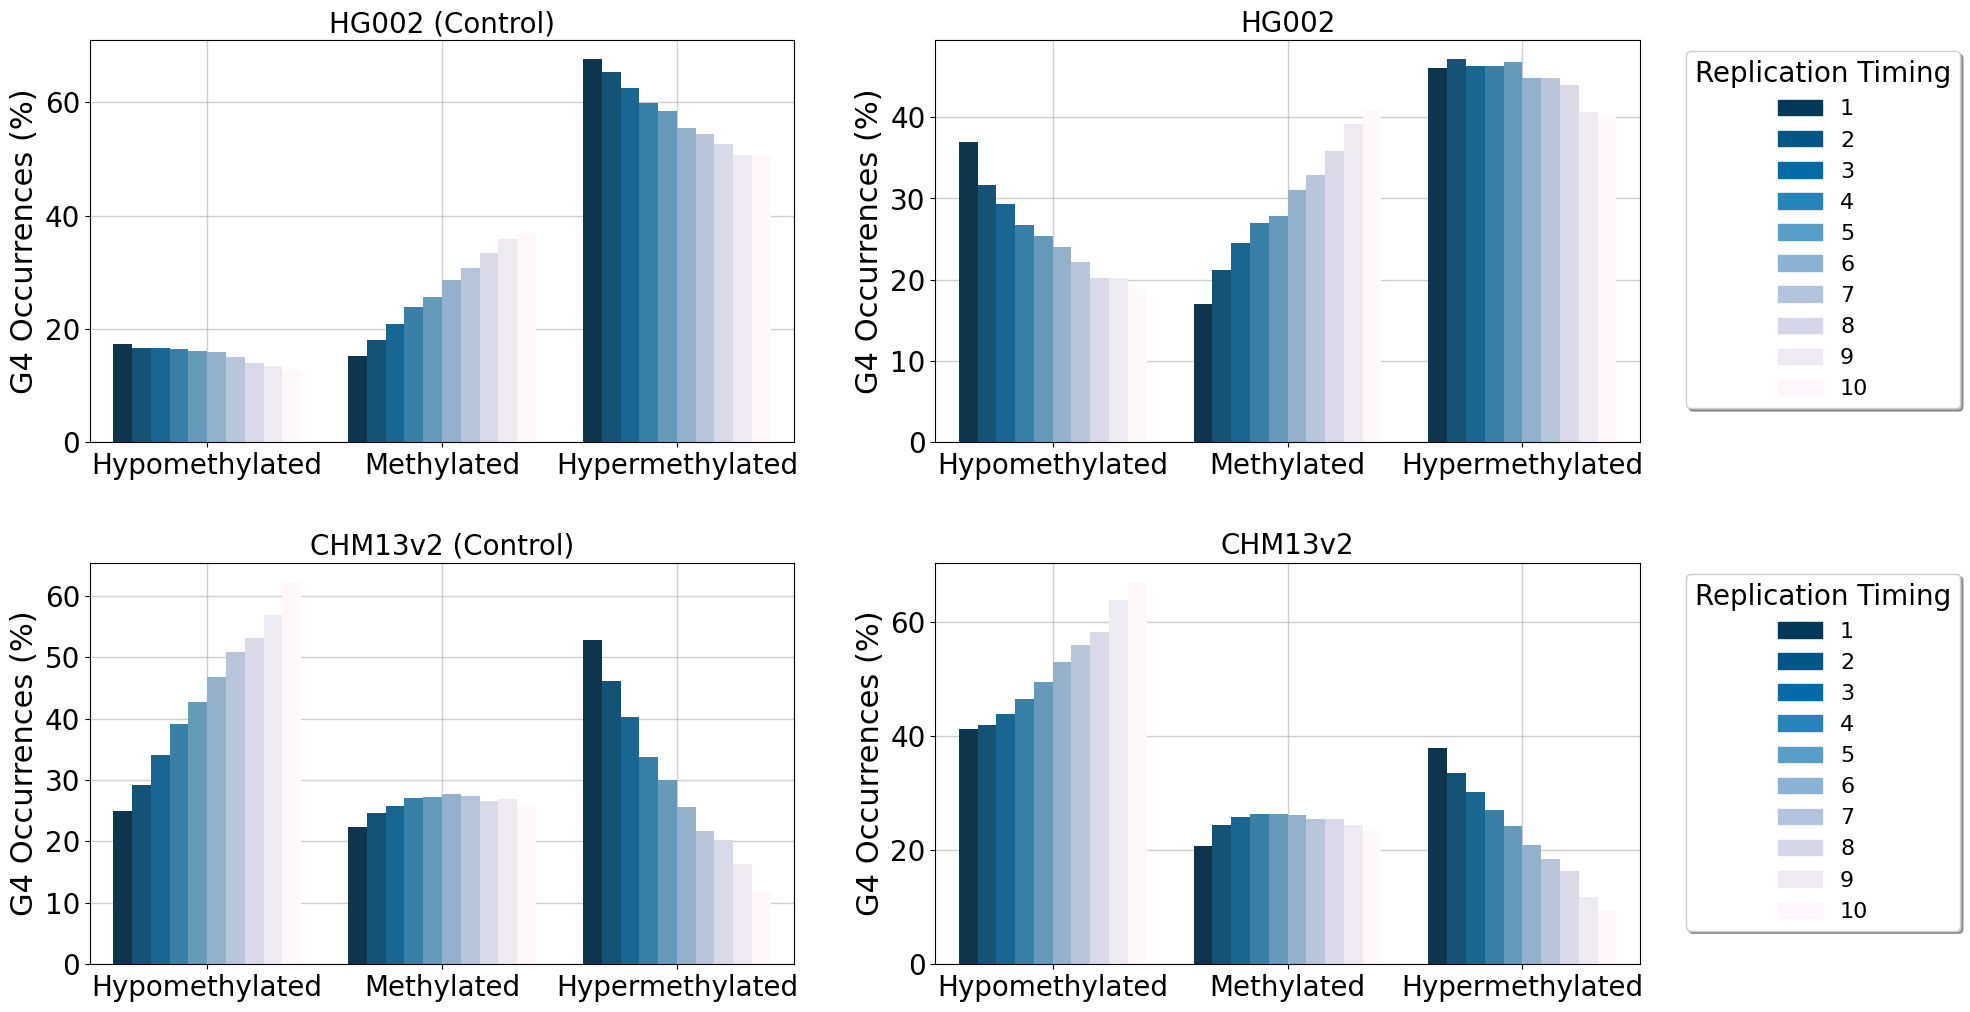

In [100]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
fig.subplots_adjust(wspace=0.2, hspace=0.3)
ax = ax.flatten()

cmap = "PuBu_r"
cmap_control = "PuBu_r"

sns.barplot(data=total_g4_controls_HG002_per_group,
            y="g4_perc",
            x="methylation_level",
            hue="rank",
            order=["Hypomethylated", "Methylated", "Hypermethylated"],
            ax=ax[0],
            palette=cmap_control,
           )
sns.barplot(data=total_g4_controls_CHM13v2_per_group,
            y="g4_perc",
            x="methylation_level",
            hue="rank",
            order=["Hypomethylated", "Methylated", "Hypermethylated"],
            ax=ax[2],
            palette=cmap_control,
           )
sns.barplot(data=total_g4_HG002_per_group,
            y="g4_perc",
            x="methylation_level",
            hue="rank",
            order=["Hypomethylated", "Methylated", "Hypermethylated"],
            ax=ax[1],
            palette=cmap,
           )
sns.barplot(data=total_g4_CHM13v2_per_group,
            y="g4_perc",
            x="methylation_level",
            hue="rank",
            order=["Hypomethylated", "Methylated", "Hypermethylated"],
            ax=ax[3],
            palette=cmap,
           )

for i in range(4):

    add_title = " (Control)" if i == 0 or i == 2 else ""
    ax_ = ax[i]
    
    if i == 0 or i == 1:
        ax_.set_title(f"HG002{add_title}")
    else:
        ax_.set_title(f"CHM13v2{add_title}")
    ax_.title.set_size(20)
    ax_.grid(lw=1.0, alpha=0.6, zorder=0)
    ax_.set_ylabel("G4 Occurrences (%)")
    ax_.set_xlabel("")
    ax_.xaxis.label.set_size(22)
    ax_.yaxis.label.set_size(22)
    ax_.tick_params(axis="both", labelsize=20)
    ax_.set_axisbelow(True)

    rank_values = sorted(total_g4_HG002_per_group["rank"].unique())
    cmap = get_cmap("PuBu_r", len(rank_values))  # evenly spaced colors
    
    # Create legend handles
    handles = [
        mpatches.Patch(color=cmap(i), 
                       label=rank_values[i])
        for i in range(len(rank_values))
    ]

    if i == 1 or i == 3:
        ax_.legend(title="Replication Timing", 
                   handles=handles, 
                   title_fontsize=20,
                   bbox_to_anchor=(1.05, 1.0), 
                   fancybox=True, 
                   prop={"size": 16},
                   shadow=True)
    else:
        ax_.legend(title="", handles=[], frameon=False)

target = Path("/storage/group/izg5139/default/nicole/g4_t2t_identification/figures/rep_timing").resolve()
target.mkdir(exist_ok=True)
fig.savefig(f"{target}/g4hunter_hg002_and_chm13v2_control_vs_g4_methylation_marks.pdf", dpi=300, bbox_inches="tight")

In [36]:
# regex-based

joint_regex_HG002_REP_TIME = pl.concat([
                            g4_regex_df_HG002_REP_TIME.select(["avg_methylation", "rank"])
                                            .with_columns(pl.lit("G4").alias("type")),
    
                            g4_regex_controls_HG002_REP_TIME.select(["avg_methylation", "rank"])
                                        .with_columns(pl.lit("Control").alias("type"))
                           ])\
                        .with_columns(
                                        pl.col("avg_methylation").map_elements(extract_methylation, return_dtype=str)
                                    .alias("methylation_level")
                        )

joint_regex_CHM13v2_REP_TIME = pl.concat([
                            g4_regex_df_CHM13v2_REP_TIME.select(["avg_methylation", "rank"])
                                    .with_columns(pl.lit("G4").alias("type")),
    
                            g4_regex_controls_CHM13v2_REP_TIME.select(["avg_methylation", "rank"])
                                        .with_columns(pl.lit("Control").alias("type"))
                           ])\
                        .with_columns(
                                        pl.col("avg_methylation").map_elements(extract_methylation, return_dtype=str)
                                    .alias("methylation_level")
                        )
joint_regex_HG002_REP_TIME


avg_methylation,rank,type,methylation_level
f64,i64,str,str
0.977273,4,"""G4""","""Hypermethylated"""
0.919948,4,"""G4""","""Hypermethylated"""
0.888889,4,"""G4""","""Hypermethylated"""
0.0394737,4,"""G4""","""Hypomethylated"""
0.049039,4,"""G4""","""Hypomethylated"""
…,…,…,…
0.044117,1,"""Control""","""Hypomethylated"""
1.0,1,"""Control""","""Hypermethylated"""
0.9426405,2,"""Control""","""Hypermethylated"""


In [37]:
# G4HUNTER

joint_HG002_REP_TIME = pl.concat([
                            g4_HG002_REP_TIME.select(["avg_methylation", "rank"])
                                            .with_columns(pl.lit("G4").alias("type")),
    
                            g4_controls_HG002_REP_TIME.select(["avg_methylation", "rank"])
                                        .with_columns(pl.lit("Control").alias("type"))
                           ])\
                        .with_columns(
                                        pl.col("avg_methylation").map_elements(extract_methylation, return_dtype=str)
                                    .alias("methylation_level")
                        )

joint_CHM13v2_REP_TIME = pl.concat([
                            g4_CHM13v2_REP_TIME.select(["avg_methylation", "rank"])
                                    .with_columns(pl.lit("G4").alias("type")),
    
                            g4_controls_CHM13v2_REP_TIME.select(["avg_methylation", "rank"])
                                        .with_columns(pl.lit("Control").alias("type"))
                           ])\
                        .with_columns(
                                        pl.col("avg_methylation").map_elements(extract_methylation, return_dtype=str)
                                    .alias("methylation_level")
                        )
joint_HG002_REP_TIME

avg_methylation,rank,type,methylation_level
f64,i64,str,str
0.939456,4,"""G4""","""Hypermethylated"""
0.919948,4,"""G4""","""Hypermethylated"""
0.919948,4,"""G4""","""Hypermethylated"""
0.698113,4,"""G4""","""Methylated"""
0.698113,4,"""G4""","""Methylated"""
…,…,…,…
0.111111,8,"""Control""","""Hypomethylated"""
0.671563,8,"""Control""","""Methylated"""
0.782609,8,"""Control""","""Hypermethylated"""


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

10_G4 vs. 10_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.001e-234 U_stat=6.370e+08
9_G4 vs. 9_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:0.000e+00 U_stat=1.249e+09
2_G4 vs. 2_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:0.000e+00 U_stat=5.537e+09
1_G4 vs. 1_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:0.000e+00 U_stat=8.379e+09
3_G4 vs. 3_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:0.000e+00 U_stat=4.965e+09
4_G4 vs. 4_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:0.000e+00 U_stat=4.077e+09
5_G4 vs. 5_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:0.000e

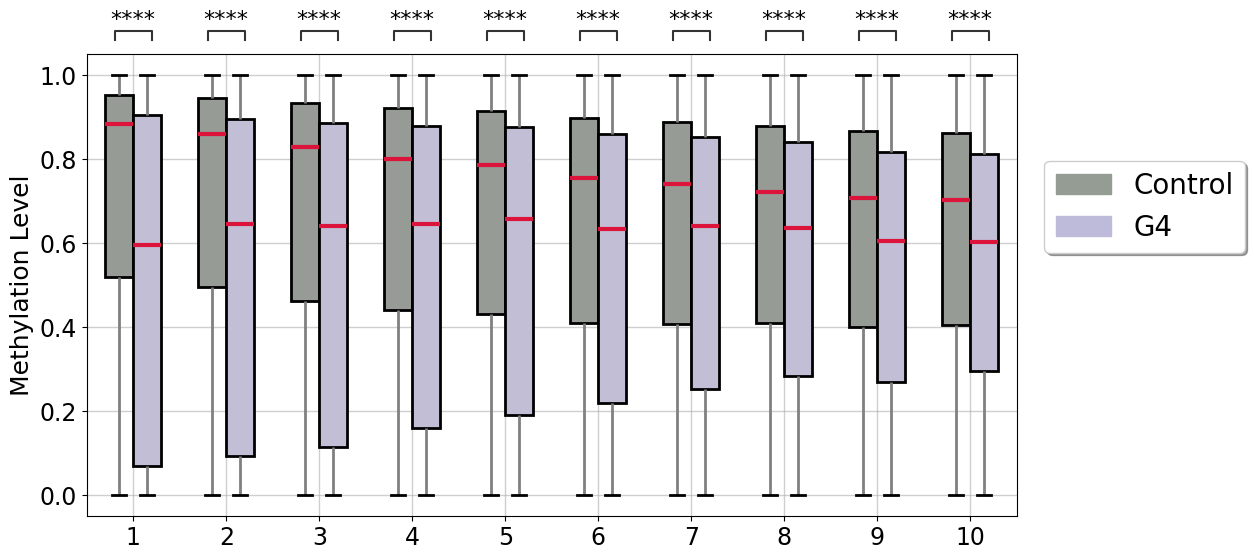

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches as mpatches
from statannotations.Annotator import Annotator

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

palette = {
           "Control": "#959c94",
           "G4": sns.color_palette("Set3")[2]
          }
sns.boxplot(data=joint_HG002_REP_TIME,
            x="rank",
            y="avg_methylation",
            hue="type",
            showfliers=False,
            palette=palette,
            width=0.6,
            hue_order=["Control", "G4"],
            ax=ax,
                boxprops=dict(linewidth=2, edgecolor='black'),
                medianprops=dict(color='crimson', linewidth=3), 
                whiskerprops=dict(linewidth=2, color='gray'),
                capprops=dict(linewidth=2, color='black'),
                # flierprops=dict(marker='o', color='orange', markersize=5)
           )
ax.grid(lw=1.0, alpha=0.6, zorder=0)
ax.set_xlabel('')
ax.set_ylabel("Methylation Level")
ax.yaxis.label.set_size(18)
ax.tick_params(axis="both", 
               labelsize=17, 
               zorder=0)
palette = {
           "Control": "#959c94",
           "G4": sns.color_palette("Set3")[2]
          }
ax.legend(title="", 
         prop={"size": 20}, 
         loc="upper right", 
         handles=[mpatches.Patch(color=palette["Control"], label="Control"),
                  mpatches.Patch(color=palette["G4"], label="G4")], 
          fancybox=True,
          bbox_to_anchor=(1.26, 0.8),
          shadow=True, 
          frameon=True
)

ranks = joint_HG002_REP_TIME["rank"].unique()

pairs=[((q, "Control"), (q, "G4")) for q in ranks]

annotator = Annotator(ax, 
                      pairs, 
                      data=joint_HG002_REP_TIME.to_pandas(), 
                      x="rank", 
                      hue="type",
                      y="avg_methylation", 
                      # order=order
                     )
annotator.configure(test='Mann-Whitney',  
                    comparisons_correction="Bonferroni",
                    text_format='star',
                    fontsize=16,
                    loc='outside')
annotator.apply_and_annotate()
target = Path("/storage/group/izg5139/default/nicole/g4_t2t_identification/figures/rep_timing").resolve()
target.mkdir(exist_ok=True)
fig.savefig(f"{target}/g4hunter_hg002_rep_timing_vs_control.pdf", dpi=300, bbox_inches="tight")

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

10_G4 vs. 10_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.001e-234 U_stat=6.370e+08
9_G4 vs. 9_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:0.000e+00 U_stat=1.249e+09
2_G4 vs. 2_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:0.000e+00 U_stat=5.537e+09
1_G4 vs. 1_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:0.000e+00 U_stat=8.379e+09
3_G4 vs. 3_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:0.000e+00 U_stat=4.965e+09
4_G4 vs. 4_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:0.000e+00 U_stat=4.077e+09
5_G4 vs. 5_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:0.000e

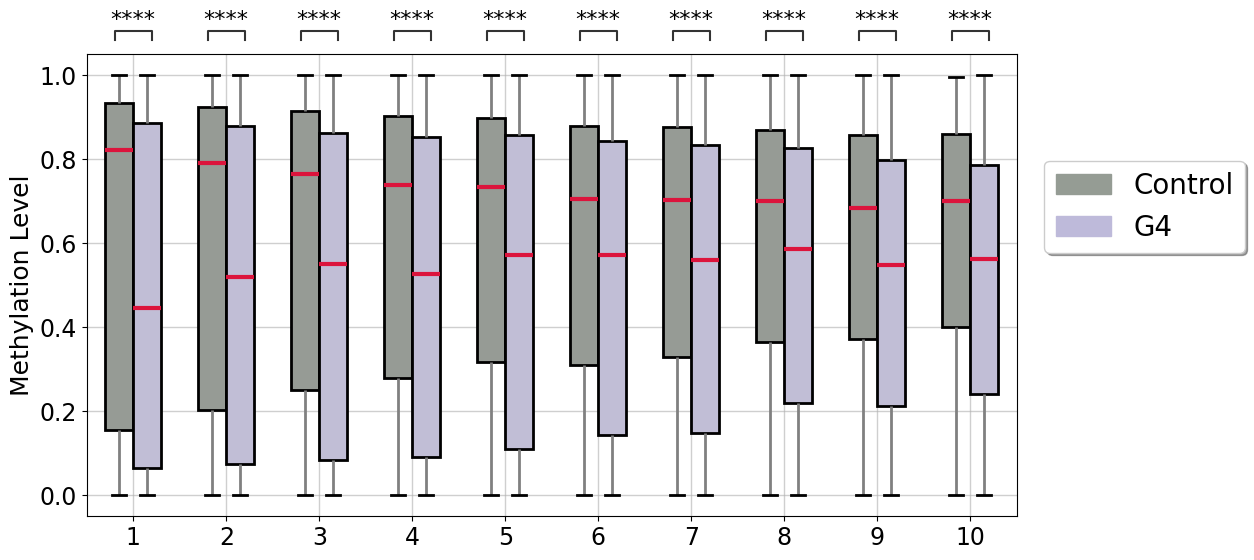

In [39]:
# regex-based
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

palette = {
           "Control": "#959c94",
           "G4": sns.color_palette("Set3")[2]
          }
sns.boxplot(data=joint_regex_HG002_REP_TIME,
            x="rank",
            y="avg_methylation",
            hue="type",
            showfliers=False,
            palette=palette,
            hue_order=["Control", "G4"],
            width=0.6,
            ax=ax,
                boxprops=dict(linewidth=2, edgecolor='black'),
                medianprops=dict(color='crimson', linewidth=3), 
                whiskerprops=dict(linewidth=2, color='gray'),
                capprops=dict(linewidth=2, color='black'),
                # flierprops=dict(marker='o', color='orange', markersize=5)
           )
ax.grid(lw=1.0, alpha=0.6, zorder=0)
ax.set_xlabel('')
ax.set_ylabel("Methylation Level")
ax.yaxis.label.set_size(18)
ax.tick_params(axis="both", 
               labelsize=17, 
               zorder=0)
ax.legend(title="", 
         prop={"size": 20}, 
         loc="upper right", 
         handles=[mpatches.Patch(color=palette["Control"], label="Control"),
                  mpatches.Patch(color=palette["G4"], label="G4")], 
          fancybox=True,
          bbox_to_anchor=(1.26, 0.8),
          shadow=True, 
          frameon=True
)

ranks = joint_HG002_REP_TIME["rank"].unique()

pairs=[((q, "Control"), (q, "G4")) for q in ranks]

annotator = Annotator(ax, 
                      pairs, 
                      data=joint_HG002_REP_TIME.to_pandas(), 
                      x="rank", 
                      hue="type",
                      y="avg_methylation", 
                      # order=order
                     )
annotator.configure(test='Mann-Whitney',  
                    comparisons_correction="Bonferroni",
                    text_format='star',
                    fontsize=16,
                    loc='outside')
annotator.apply_and_annotate()
target = Path("/storage/group/izg5139/default/nicole/g4_t2t_identification/figures/rep_timing").resolve()
target.mkdir(exist_ok=True)
fig.savefig(f"{target}/g4_hg002_rep_timing_vs_controls.regex-based.pdf", dpi=300, bbox_inches="tight")

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

10_G4 vs. 10_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:6.785e-45 U_stat=6.777e+08
9_G4 vs. 9_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:4.919e-154 U_stat=1.266e+09
2_G4 vs. 2_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:0.000e+00 U_stat=5.933e+09
1_G4 vs. 1_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:0.000e+00 U_stat=9.120e+09
3_G4 vs. 3_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:0.000e+00 U_stat=5.260e+09
4_G4 vs. 4_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:0.000e+00 U_stat=4.325e+09
5_G4 vs. 5_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:3.178e

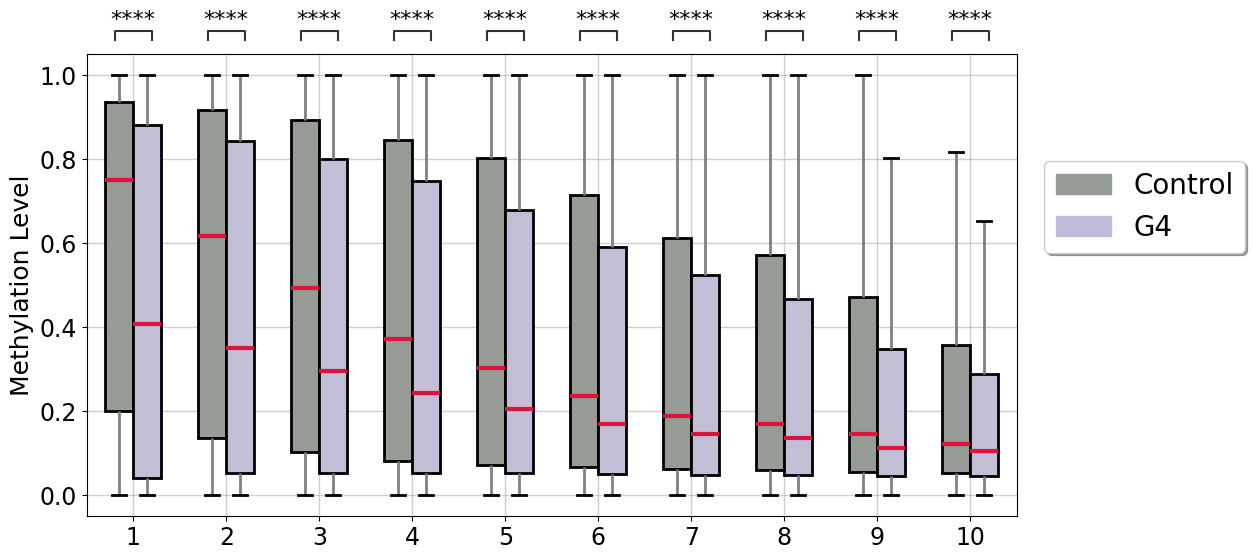

In [40]:
# G4HUNTER
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches as mpatches
from statannotations.Annotator import Annotator

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

palette = {
           "Control": "#959c94",
           "G4": sns.color_palette("Set3")[2]
          }
sns.boxplot(data=joint_CHM13v2_REP_TIME,
            x="rank",
            y="avg_methylation",
            hue="type",
            showfliers=False,
            palette=palette,
            width=0.6,
            hue_order=["Control", "G4"],
            ax=ax,
                boxprops=dict(linewidth=2, edgecolor='black'),
                medianprops=dict(color='crimson', linewidth=3), 
                whiskerprops=dict(linewidth=2, color='gray'),
                capprops=dict(linewidth=2, color='black'),
                # flierprops=dict(marker='o', color='orange', markersize=5)
           )
ax.grid(lw=1.0, alpha=0.6, zorder=0)
ax.set_xlabel('')
ax.set_ylabel("Methylation Level")
ax.yaxis.label.set_size(18)
ax.tick_params(axis="both", 
               labelsize=17, 
               zorder=0)
ax.legend(title="", 
         prop={"size": 20}, 
         loc="upper right", 
         handles=[mpatches.Patch(color=palette["Control"], label="Control"),
                  mpatches.Patch(color=palette["G4"], label="G4")], 
          fancybox=True,
          bbox_to_anchor=(1.26, 0.8),
          shadow=True, 
          frameon=True
)

ranks = joint_HG002_REP_TIME["rank"].unique()

pairs=[((q, "Control"), (q, "G4")) for q in ranks]

annotator = Annotator(ax, 
                      pairs, 
                      data=joint_CHM13v2_REP_TIME.to_pandas(), 
                      x="rank", 
                      hue="type",
                      y="avg_methylation", 
                      # order=order
                     )
annotator.configure(test='Mann-Whitney',  
                    comparisons_correction="Bonferroni",
                    text_format='star',
                    fontsize=16,
                    loc='outside')
annotator.apply_and_annotate()
target = Path("/storage/group/izg5139/default/nicole/g4_t2t_identification/figures/rep_timing").resolve()
target.mkdir(exist_ok=True)
fig.savefig(f"{target}/g4hunter_chm13v2_rep_timing_vs_contron.pdf", dpi=300, bbox_inches="tight")

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

10_G4 vs. 10_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:6.785e-45 U_stat=6.777e+08
9_G4 vs. 9_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:4.919e-154 U_stat=1.266e+09
2_G4 vs. 2_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:0.000e+00 U_stat=5.933e+09
1_G4 vs. 1_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:0.000e+00 U_stat=9.120e+09
3_G4 vs. 3_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:0.000e+00 U_stat=5.260e+09
4_G4 vs. 4_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:0.000e+00 U_stat=4.325e+09
5_G4 vs. 5_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:3.178e

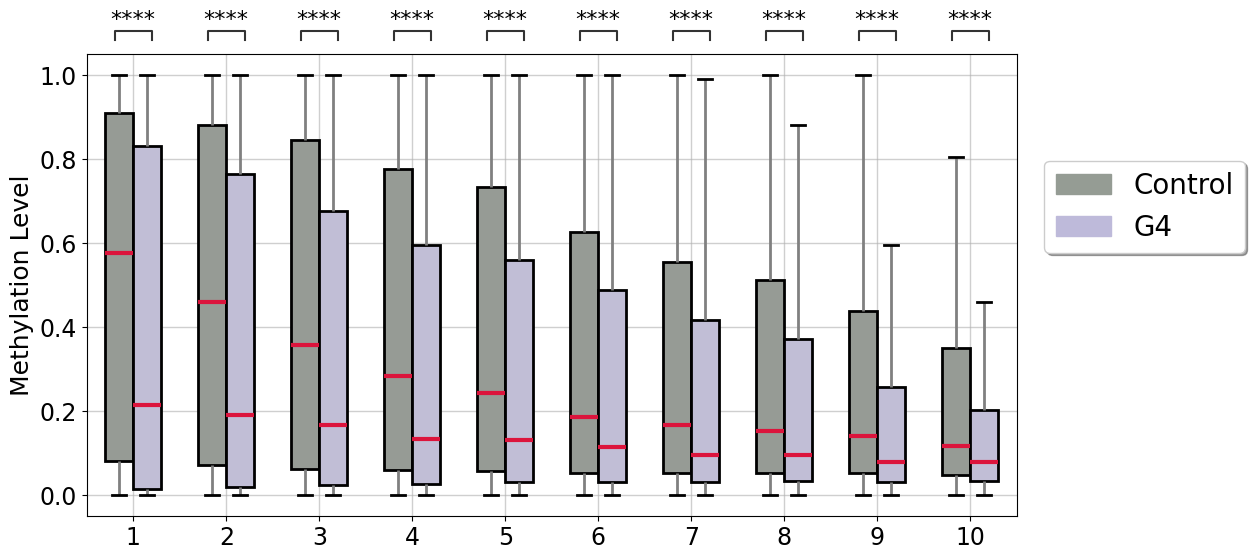

In [41]:
# REGEX-BASED

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

palette = {
           "Control": "#959c94",
           "G4": sns.color_palette("Set3")[2]
          }
sns.boxplot(data=joint_regex_CHM13v2_REP_TIME,
            x="rank",
            y="avg_methylation",
            hue="type",
            showfliers=False,
            palette=palette,
            hue_order=["Control", "G4"],
            width=0.6,
            ax=ax,
                boxprops=dict(linewidth=2, edgecolor='black'),
                medianprops=dict(color='crimson', linewidth=3), 
                whiskerprops=dict(linewidth=2, color='gray'),
                capprops=dict(linewidth=2, color='black'),
                # flierprops=dict(marker='o', color='orange', markersize=5)
           )
ax.grid(lw=1.0, alpha=0.6, zorder=0)
ax.set_xlabel('')
ax.set_ylabel("Methylation Level")
ax.yaxis.label.set_size(18)
ax.tick_params(axis="both", 
               labelsize=17, 
               zorder=0)
ax.legend(title="", 
         prop={"size": 20}, 
         loc="upper right", 
         handles=[mpatches.Patch(color=palette["Control"], label="Control"),
                  mpatches.Patch(color=palette["G4"], label="G4")], 
          fancybox=True,
          bbox_to_anchor=(1.26, 0.8),
          shadow=True, 
          frameon=True
)

ranks = joint_HG002_REP_TIME["rank"].unique()

pairs=[((q, "Control"), (q, "G4")) for q in ranks]

annotator = Annotator(ax, 
                      pairs, 
                      data=joint_CHM13v2_REP_TIME.to_pandas(), 
                      x="rank", 
                      hue="type",
                      y="avg_methylation", 
                      # order=order
                     )
annotator.configure(test='Mann-Whitney',  
                    comparisons_correction="Bonferroni",
                    text_format='star',
                    fontsize=16,
                    loc='outside')
annotator.apply_and_annotate()
target = Path("/storage/group/izg5139/default/nicole/g4_t2t_identification/figures/rep_timing").resolve()
target.mkdir(exist_ok=True)
fig.savefig(f"{target}/g4_hm13v2_rep_timing_vs_controls.regex-based.pdf", dpi=300, bbox_inches="tight")